# PyTorch Workflow

We'll explore an example of PyTorch end-to-end workflow.

In [2]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

# 1. Preparing and loading data

Data can be almost anything.
* Excel spreadsheet
* Images
* Videos
* Audio
* DNA
* Text

Deep/Machine Learning:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

We'll use a **linear regression formula** to make a straight line with *known* **parameters**.

`Y = a + bX`

In [4]:
# Known parameters

weight = 0.7 # b
bias = 0.3 # a

In [5]:
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X), len(y)

(50, 50)

## Splitting data into training and test sets (one of the most important concepts in ML in general)
* training set
* validation set (optional)
* testing set

In [7]:
# Train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

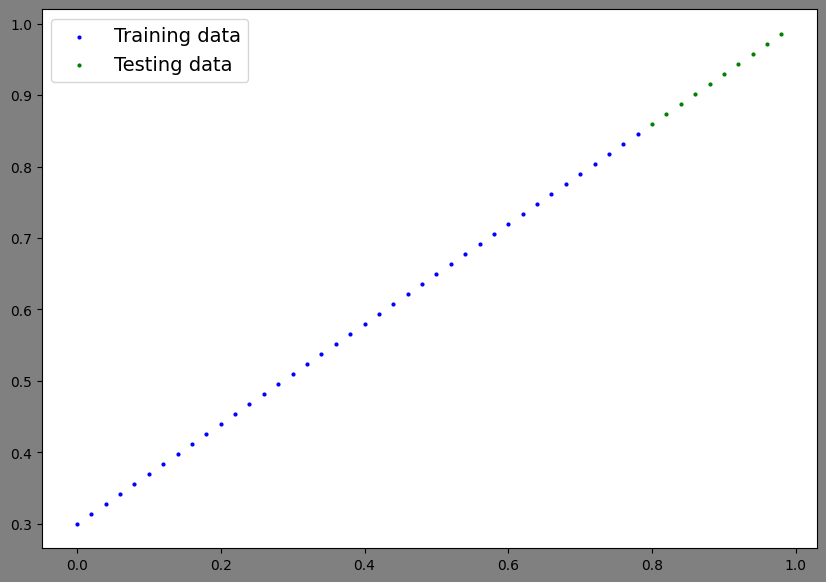

In [8]:
# Visualize data 

def plot_predictions(train_data = X_train, 
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
# Plots training data, test data and compares predictions  
  plt.figure(figsize = (10, 7), facecolor = "gray")

# Plot training data in blue

  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

# Plot test data in green

  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")

# Are there predictions?

  if predictions is not None:

    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")

# Legend

  plt.legend(prop = {"size" : 14});

# Set the background color

  # plt.gca().set_facecolor('gray')

plot_predictions()

# 2. Build model

What our model does:
* start with random values (wieght & bias)
* look at training data and adjust the random values to better represent the ideal values (weight & bias we created)

Main algorithms:
1. Gradient descent
2. Backpropagation

In [9]:
from torch import nn

class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherhits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

  # Forward method to define the computation in the model

  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias # linear regression formula


## PyTorch model building essentials

* **torch.nn** - contains all of the buildings for computational graphs (a neural network)
* **torch.nn.Parameter** - what parameters should our model try and learn, they are often set by torch.nn
* **torch.nn.Module** - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* **torch.optim** - optimizers, that will help with gradient descent
* **def forward()** - all nn.Module subclasses require you to overwrite forward(), this method is 




## Checking the contents of our PyTorch model

In [10]:
# using .parameters()

torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

## Predictions with `torch.inference_mode()`
Predictions for *y_test* based on *X_test*

When we pass data through our model, it's going to run it through the `forward()` method



In [13]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

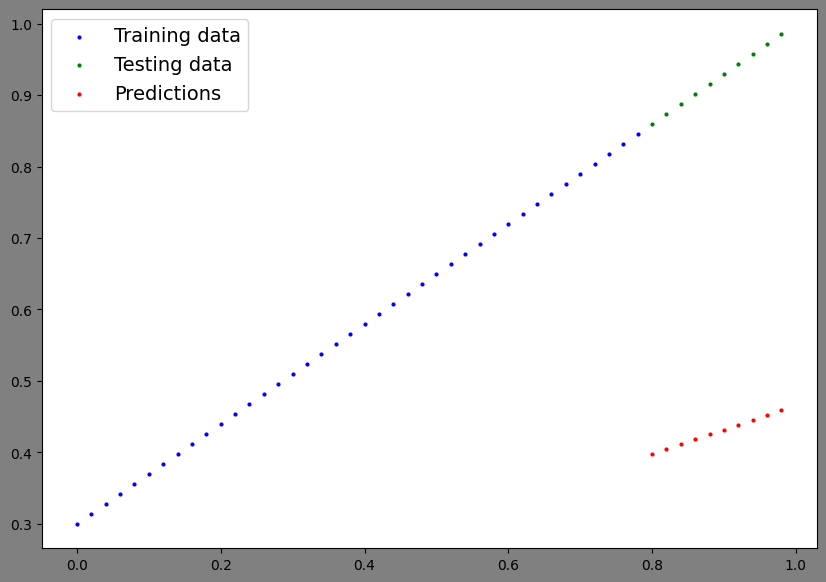

In [16]:
plot_predictions(predictions=y_preds) 

# 3. Train model

Training is for a model to move from some *unknown* parameters to *known* parameters.

One way to measure evaluate your model's predictions is to use a *loss* function.

Loss functions may also be called cost function or criterion in different areas.

Thing we need to train:

* **Loss function**: A function that measure how wrong your model's predictions are to the ideal outpus (lower is better).
* **Optimizer**: Takes into account the loss of the model and adjusts the model's parameters (in our case weight & bias) to improve the loss function.

And specifically for PyTorch, we need:

* A training loop
* A testing loop



In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# Loss function

loss_fn = nn.L1Loss()

# Optimizer (stochastic(random) gradient descent)

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01) # lr = learning rate = important hyperparameter

## Training and Testing loops

We need:

0. Loop through the data.
1. Forward pass (this involves data moving though our model's functions to make predictions on data, also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - moves backwards though the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step (**gradient descent**)

## Model 1

In [20]:
## Training

# epoch is one loop through the data (hyperparameter)
epochs = 201

epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data.

def training_testing(model_0, epochs, y_train, X_train, y_test, X_test, loss_fn, optimizer):
  for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # sets all parameters that require gradients to require gradients

    # 1. Forward pass 
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    #print(f"Loss: {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer set
    optimizer.step()

    ## Testing

    model_0.eval() # turns off different setting in the model not needed for evaluation/testing
    with torch.inference_mode(): # turns off gradient tracking and a couple more thing bts ( or with `torch.no_grad()`)

      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test)
      #print(f"Test Loss: {test_loss}")

    # Print out what's happening
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
      print(model_0.state_dict())

training_testing(model_0, epochs, y_train, X_train, y_test, X_test, loss_fn, optimizer)    

Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Test: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Test: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Test: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Test: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Test: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Test: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [21]:
print(f"Epoch count: {epoch_count}")
print(f"Loss values: {loss_values}")
print(f"Test loss values: {test_loss_values}")

Epoch count: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
Loss values: [tensor(0.3129, grad_fn=<MeanBackward0>), tensor(0.1977, grad_fn=<MeanBackward0>), tensor(0.0891, grad_fn=<MeanBackward0>), tensor(0.0531, grad_fn=<MeanBackward0>), tensor(0.0454, grad_fn=<MeanBackward0>), tensor(0.0417, grad_fn=<MeanBackward0>), tensor(0.0382, grad_fn=<MeanBackward0>), tensor(0.0348, grad_fn=<MeanBackward0>), tensor(0.0313, grad_fn=<MeanBackward0>), tensor(0.0279, grad_fn=<MeanBackward0>), tensor(0.0245, grad_fn=<MeanBackward0>), tensor(0.0210, grad_fn=<MeanBackward0>), tensor(0.0176, grad_fn=<MeanBackward0>), tensor(0.0142, grad_fn=<MeanBackward0>), tensor(0.0107, grad_fn=<MeanBackward0>), tensor(0.0073, grad_fn=<MeanBackward0>), tensor(0.0039, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>)]
Test loss values:

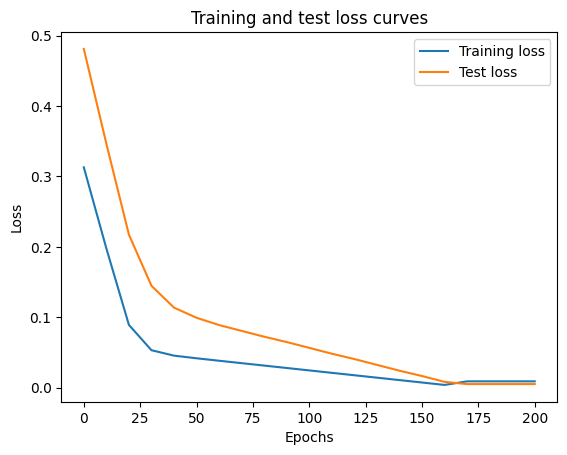

In [22]:
import numpy as np

# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Training loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [24]:
weight, bias

(0.7, 0.3)

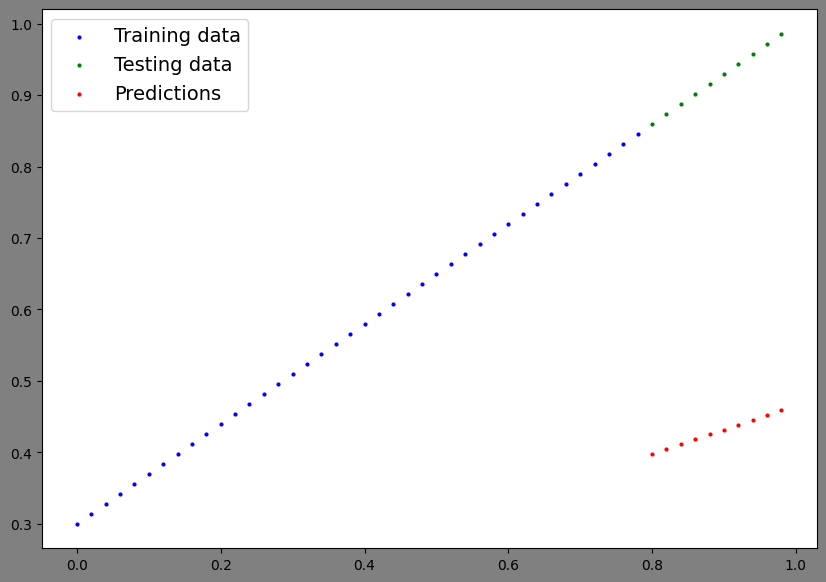

In [25]:
with torch.inference_mode():
  plot_predictions(predictions = y_preds)

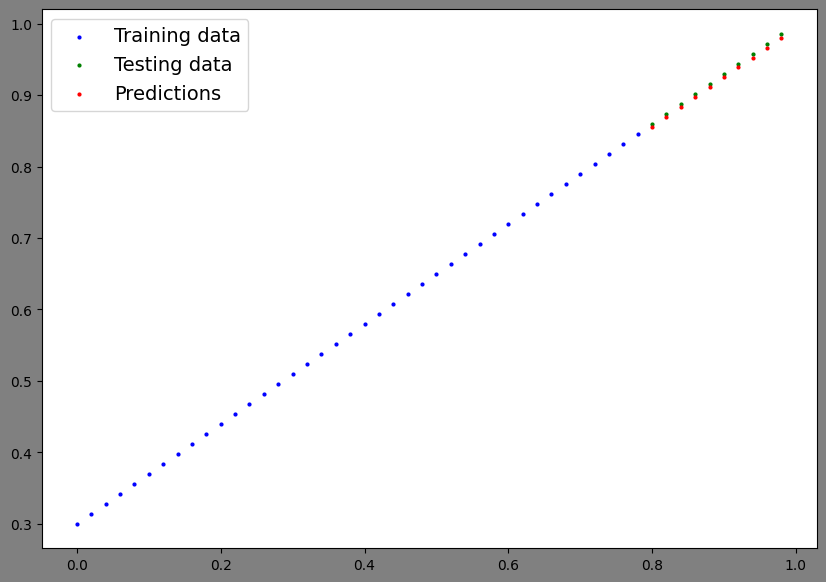

In [26]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

model_0_preds = y_preds_new

plot_predictions(predictions = y_preds_new)

##Model 2

In [27]:
torch.manual_seed(17)

model_1 = LinearRegressionModel()

model_1.state_dict()

OrderedDict([('weights', tensor([-1.4135])), ('bias', tensor([0.2336]))])

In [28]:
epochs_1 = 1001
optimizer_1 = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

training_testing(model_1, epochs_1, y_train, X_train, y_test, X_test, loss_fn, optimizer_1)    

Epoch: 0 | Test: 0.8906393051147461 | Test loss: 1.933924913406372
OrderedDict([('weights', tensor([-1.4096])), ('bias', tensor([0.2436]))])
Epoch: 10 | Test: 0.7785357236862183 | Test loss: 1.801214575767517
OrderedDict([('weights', tensor([-1.3706])), ('bias', tensor([0.3416]))])
Epoch: 20 | Test: 0.6852728724479675 | Test loss: 1.6791822910308838
OrderedDict([('weights', tensor([-1.3318])), ('bias', tensor([0.4291]))])
Epoch: 30 | Test: 0.6096686720848083 | Test loss: 1.5676844120025635
OrderedDict([('weights', tensor([-1.2936])), ('bias', tensor([0.5066]))])
Epoch: 40 | Test: 0.5493177771568298 | Test loss: 1.4670764207839966
OrderedDict([('weights', tensor([-1.2564])), ('bias', tensor([0.5741]))])
Epoch: 50 | Test: 0.5014746189117432 | Test loss: 1.3771427869796753
OrderedDict([('weights', tensor([-1.2205])), ('bias', tensor([0.6321]))])
Epoch: 60 | Test: 0.4625020921230316 | Test loss: 1.2952861785888672
OrderedDict([('weights', tensor([-1.1859])), ('bias', tensor([0.6831]))])
Ep

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Training loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(predictions = y_preds)

# 4. Saving a model in PyTorch

* `torch.save()` - saves a PyTorch object in Python's pickele format

* `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary

In [ ]:
from pathlib import Path
 
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

In [ ]:
!ls -l models

# 5. Loading a model in PyTorch

* `torch.load()` - loads a PyTorch object

In [ ]:
torch.manual_seed(42)

loaded_model_0 = LinearRegressionModel()

loaded_model_0.state_dict()

In [ ]:
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

In [ ]:
model_0.state_dict()

In [ ]:
loaded_model_0.state_dict()

In [ ]:
# Make some predictions

loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_0_preds = loaded_model_0(X_test)

loaded_model_0_preds  

In [ ]:
# Compare loaded model preds with original model preds

plot_predictions(predictions = loaded_model_0_preds)

In [ ]:
model_0_preds == loaded_model_0_preds  

# 6. Putting it all together

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

In [ ]:
# Device-agnostic code (use GPU if available if not use default = CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

## 6.1. Data

In [ ]:
# Create data using linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

In [ ]:
# Split data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test), 

In [ ]:
# Plot the data

plot_predictions(X_train, y_train, X_test, y_test)

## 6.2. Building a PyTorch Linear Model

In [ ]:
# Create a liner model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # Use `nn.Linear()` for creating the model parameters / also called linear transform, probing layer, fully connected layer, etc.
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)

# Create an object of LinearRegressionModelV2
model_2 = LinearRegressionModelV2()
model_2, model_2.state_dict()

In [ ]:
# Check the model current device
next(model_2.parameters()).device

In [ ]:
# Set the model to use the target device
model_2.to(device)
next(model_2.parameters()).device

## 6.3. Training

* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE (mean absolute error)

# Setup optimizer
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 201

# Put data on target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_2.train()

  # 1. Forward pass
  y_pred = model_2(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

In [ ]:
model_2.state_dict()

In [ ]:
weight, bias

In [ ]:
## 6.4 Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_2.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_pred_new = model_2(X_test)

y_pred_new

In [ ]:
# Check out our model predictions visually
plot_predictions(predictions = y_pred_new.cpu())

## 6.5. Saving a model in PyTorch

In [ ]:
from pathlib import Path
 
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(), f = MODEL_SAVE_PATH)

## 6.6. Loading a model in PyTorch

In [ ]:
torch.manual_seed(42)

# Create a new instance of linear reggresion model V2
loaded_model_2 = LinearRegressionModelV2()

# Load the saved model_2 state_dict
loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_2.to(device)

In [ ]:
next(loaded_model_2.parameters()).device

In [ ]:
loaded_model_2.state_dict()

In [ ]:
# Evaluate loaded model
loaded_model_2.eval()

with torch.inference_mode():
  loaded_model_2_pred = loaded_model_2(X_test)

y_pred_new == loaded_model_2_pred